# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | itatiaia
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | houma
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | kapoeta
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | martapura
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | kalemie
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | ortona
Processing Record 22 of Set 1 | howard springs
Processing Record 23 of Set 

Processing Record 37 of Set 4 | seka
Processing Record 38 of Set 4 | manokwari
Processing Record 39 of Set 4 | sinnamary
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | zhengjiatun
Processing Record 43 of Set 4 | lazaro cardenas
Processing Record 44 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 4 | vao
Processing Record 46 of Set 4 | soyo
Processing Record 47 of Set 4 | dalby
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 0 of Set 5 | la salle
Processing Record 1 of Set 5 | comodoro rivadavia
Processing Record 2 of Set 5 | pimentel
Processing Record 3 of Set 5 | eisenerz
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | bismil
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | villa de cura
Processing Record 9 of S

Processing Record 26 of Set 8 | araouane
Processing Record 27 of Set 8 | paita
Processing Record 28 of Set 8 | longyearbyen
Processing Record 29 of Set 8 | am timan
Processing Record 30 of Set 8 | panaba
Processing Record 31 of Set 8 | matamoros
Processing Record 32 of Set 8 | imeni poliny osipenko
Processing Record 33 of Set 8 | brazzaville
Processing Record 34 of Set 8 | praia
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | suozhen
Processing Record 37 of Set 8 | lakhnau
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | kazachinskoye
Processing Record 41 of Set 8 | sorland
Processing Record 42 of Set 8 | altamont
Processing Record 43 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 44 of Set 8 | priyutnoye
Processing Record 45 of Set 8 | sorong
Processing Record 46 of Set 8 | heihe
Processing Record 47 of Set 8 | birjand
Processing Record 48 of Set 8 | jiblah
Processing Recor

Processing Record 12 of Set 12 | port lavaca
Processing Record 13 of Set 12 | batsfjord
Processing Record 14 of Set 12 | mackay
Processing Record 15 of Set 12 | chicama
Processing Record 16 of Set 12 | chabahar
Processing Record 17 of Set 12 | vagay
Processing Record 18 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 12 | ordzhonikidze
Processing Record 20 of Set 12 | hoquiam
Processing Record 21 of Set 12 | kulhudhuffushi
Processing Record 22 of Set 12 | zapolyarnyy
Processing Record 23 of Set 12 | svetlogorsk
Processing Record 24 of Set 12 | berkakit
Processing Record 25 of Set 12 | zamhlay
City not found. Skipping...
Processing Record 26 of Set 12 | la antigua
Processing Record 27 of Set 12 | sonipat
Processing Record 28 of Set 12 | san felipe
Processing Record 29 of Set 12 | chirilagua
Processing Record 30 of Set 12 | swarzedz
Processing Record 31 of Set 12 | lianran
Processing Record 32 of Set 12 | krasnyy tkach
Processing Record 33 of Set 12 | kont

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-30.99,100,94,1.67,RU,1680123182
1,clyde river,70.4692,-68.5914,-17.87,78,40,1.03,CA,1680123182
2,hamilton,39.1834,-84.5333,14.58,36,20,8.23,US,1680123157
3,saint-philippe,-21.3585,55.7679,25.77,77,73,4.00,RE,1680123183
4,itatiaia,-22.4961,-44.5633,22.24,95,99,1.04,BR,1680123183


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-30.99,100,94,1.67,RU,1680123182
1,clyde river,70.4692,-68.5914,-17.87,78,40,1.03,CA,1680123182
2,hamilton,39.1834,-84.5333,14.58,36,20,8.23,US,1680123157
3,saint-philippe,-21.3585,55.7679,25.77,77,73,4.00,RE,1680123183
4,itatiaia,-22.4961,-44.5633,22.24,95,99,1.04,BR,1680123183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

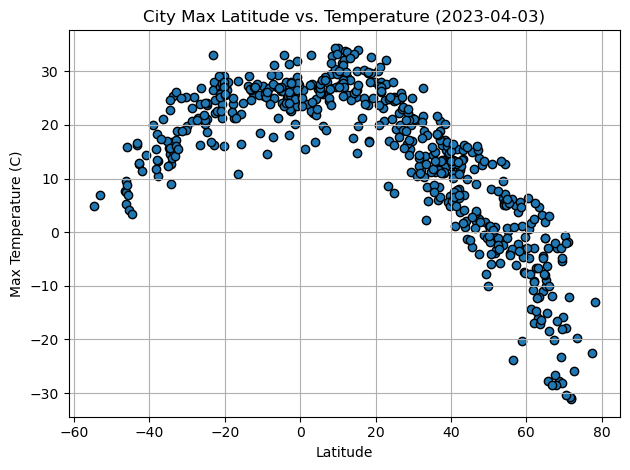

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature (2023-04-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

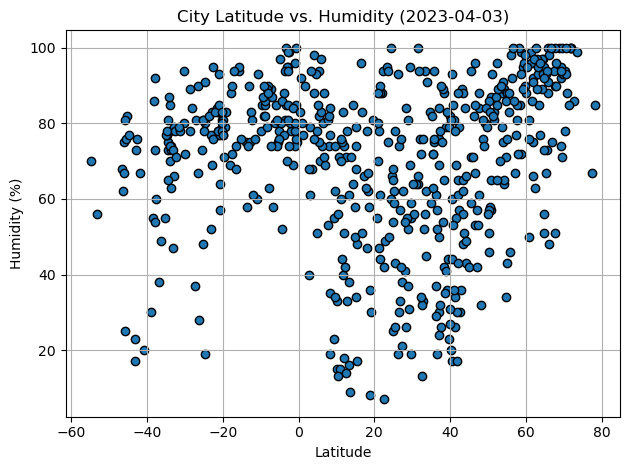

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2023-04-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

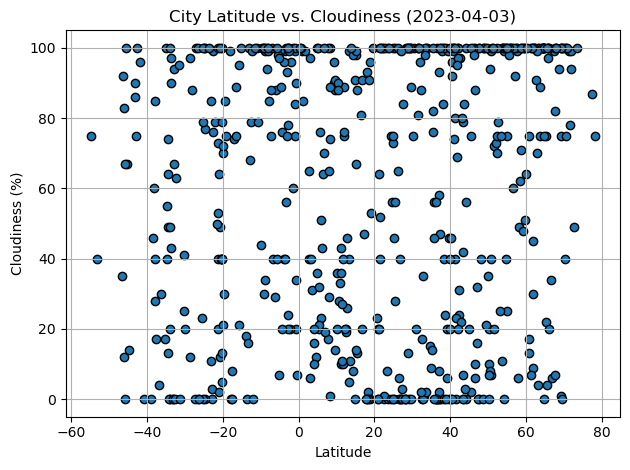

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2023-04-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

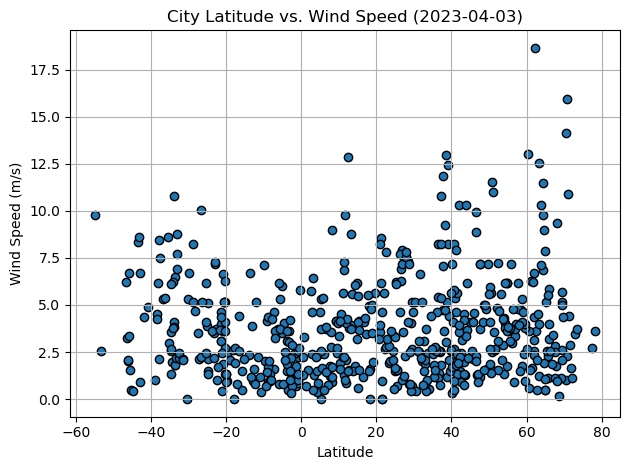

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2023-04-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue}")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-30.99,100,94,1.67,RU,1680123182
1,clyde river,70.4692,-68.5914,-17.87,78,40,1.03,CA,1680123182
2,hamilton,39.1834,-84.5333,14.58,36,20,8.23,US,1680123157
6,houma,29.5958,-90.7195,17.00,55,89,5.14,US,1680122964
8,kodiak,57.7900,-152.4072,3.73,81,100,6.17,US,1680122967


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,saint-philippe,-21.3585,55.7679,25.77,77,73,4.00,RE,1680123183
4,itatiaia,-22.4961,-44.5633,22.24,95,99,1.04,BR,1680123183
5,rawson,-43.3002,-65.1023,16.32,23,90,8.33,AR,1680123183
7,puerto ayora,-0.7393,-90.3518,31.98,85,90,2.24,EC,1680123184
10,new norfolk,-42.7826,147.0587,12.73,76,100,0.89,AU,1680123184


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8941488666338526


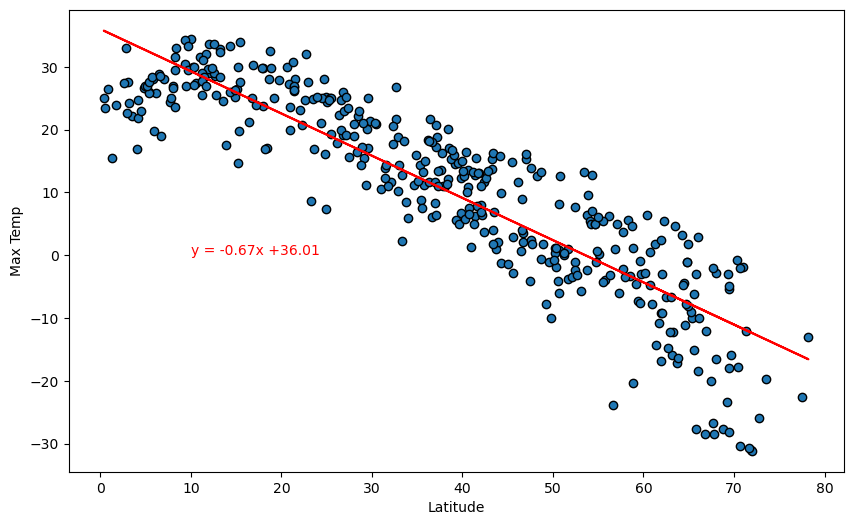

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", (10, 0))

The r-value is: 0.7386181767747583


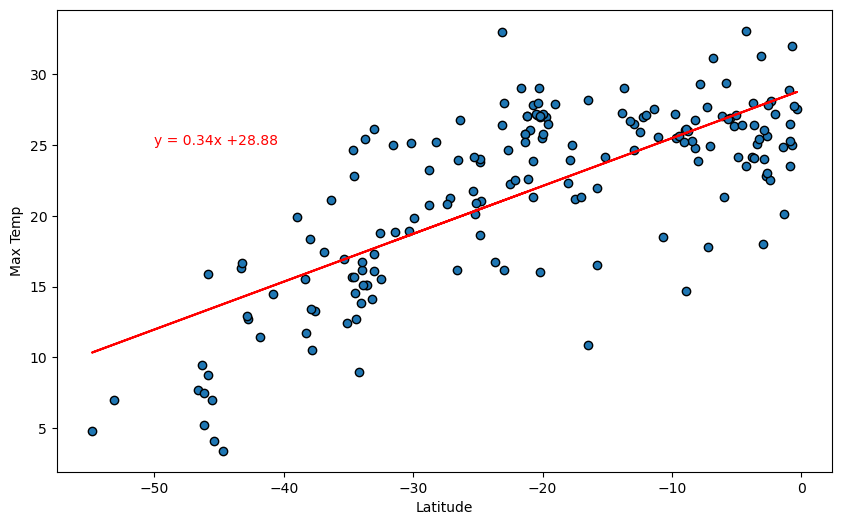

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", (-50, 25))

**Discussion about the linear relationship:** In the northern hemisphere, temperature decreases the further you are from the equator.  In the southern hemisphere, the temperature increases the closer you get to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3529430731411438


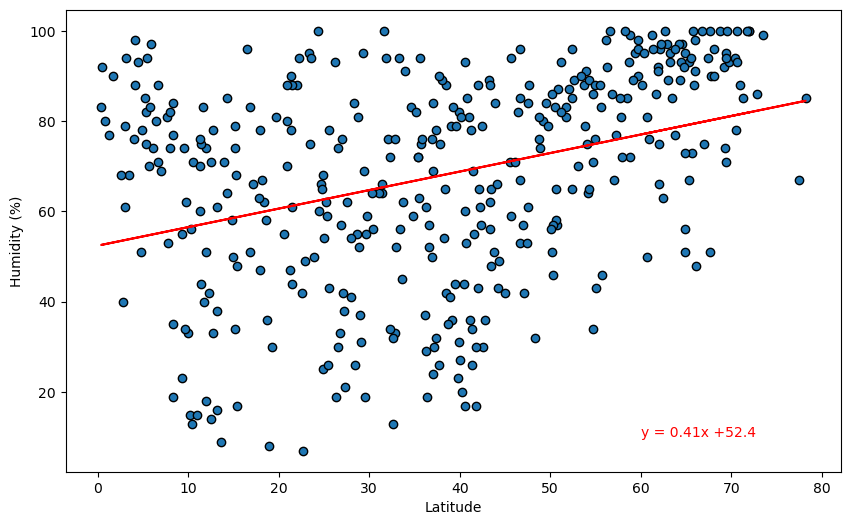

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", (60,10))

The r-value is: 0.43238559196460974


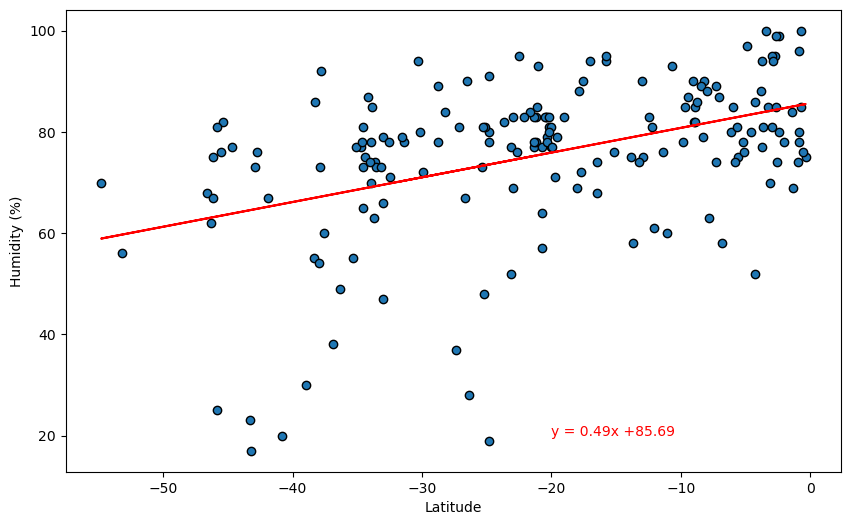

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", (-20,20))

**Discussion about the linear relationship:** In the southern hemisphere, there is more humidity the closer you are to the equator.  In the northern hemisphere, there is more humidity the farther you are from the equator, but the data is not very closely correlated.  There are a lot of outliers and spread out data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2091115722914027


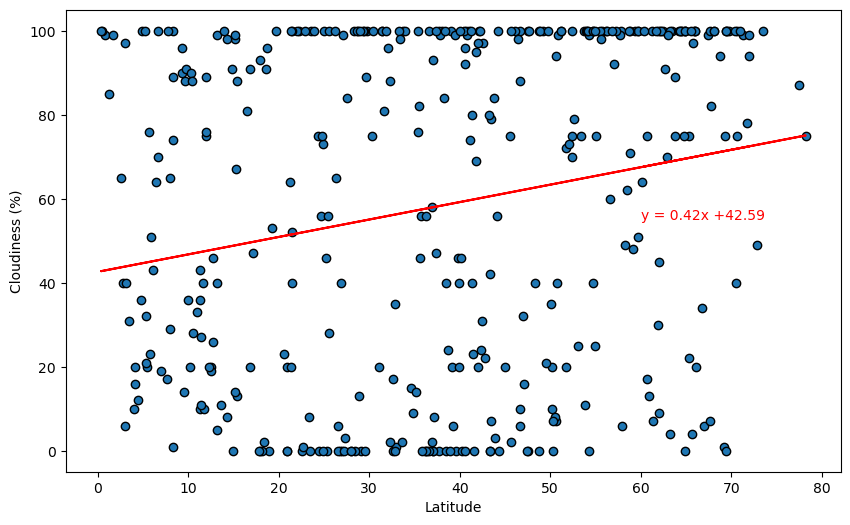

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (60,55))

The r-value is: 0.22742382913853096


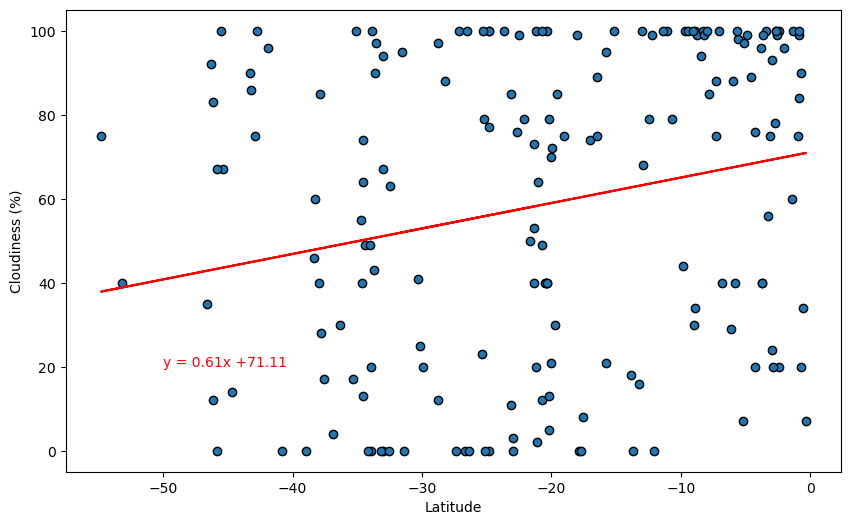

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** The cloudiness is not very closely correlated to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14378579314573536


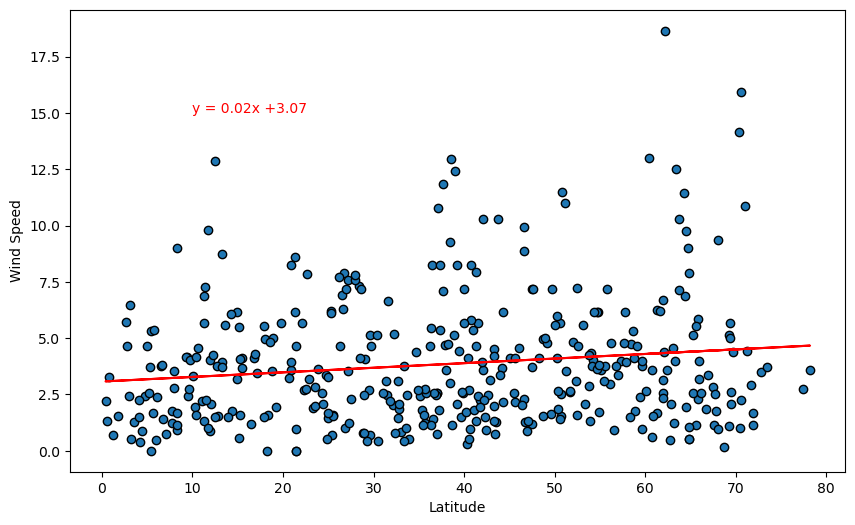

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (10,15))

The r-value is: -0.3604376738236604


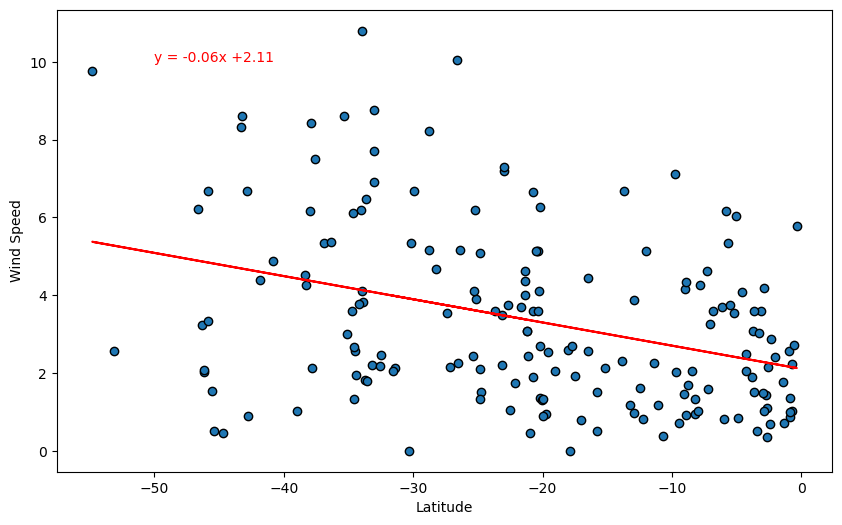

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-50,10))

**Discussion about the linear relationship:** Wind speed in the northern hemisphere is relatively steady with a few outliers.  Wind speed in the southern hemisphere seems to decrease slowly the closer you are to the equator, but is very loosly correlated.